# Exploratory Data Analysis
Here we will get to know our data more in depth

In [4]:
import pandas as pd

df = pd.read_csv("../data/raw_cancer_data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.drop(columns=df.columns[-1], inplace=True)

In [8]:
df.shape

(569, 32)

In [9]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

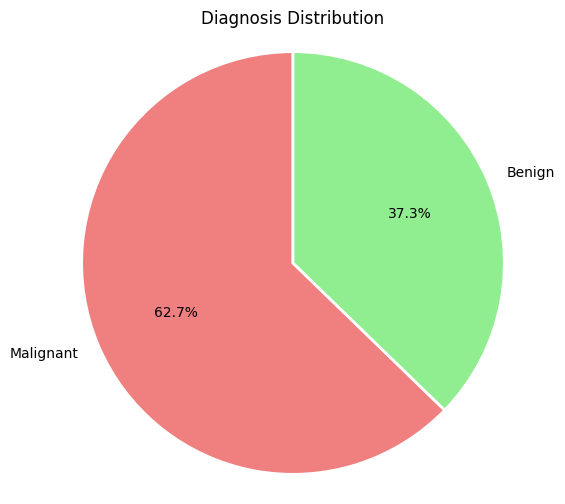

In [13]:
import matplotlib.pyplot as plt

# pie plot the diagnosis column
diagnosis_counts = df["diagnosis"].value_counts()
labels = ["Malignant", "Benign"]
colors = ["lightcoral", "lightgreen"]

plt.figure(figsize=(6, 6))
plt.pie(
    diagnosis_counts,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "white", "linewidth": 2},
)
plt.title("Diagnosis Distribution")
plt.axis("equal")
plt.show()

### Information gain

In [15]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


In [16]:
mi_scores = mutual_info_classif(X, y)

In [18]:
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

In [19]:
mi_df

,Feature,Mutual Information
23,perimeter_worst,0.475300
24,area_worst,0.463845
21,radius_worst,0.455032
8,concave points_mean,0.439434
28,concave points_worst,0.435847
3,perimeter_mean,0.404136
7,concavity_mean,0.375413
1,radius_mean,0.365367
4,area_mean,0.360794
14,area_se,0.340885


- **Perimeter Worst:** Measures the worst (largest) perimeter of the tumor across multiple measurements, indicating potential aggressiveness.

- **Area Worst:** Represents the worst (largest) area of the tumor, suggesting a larger size that may correlate with malignancy.

- **Radius Worst:** Captures the worst radius (half of the diameter) of the tumor, often associated with advanced or aggressive tumors.

- **Concave Points Mean:** Measures the average number of concave points (indentations) on the tumor's contour, indicating irregularity and potential malignancy.

- **Concave Points Worst:** Represents the worst count of concave points across measurements, suggesting aggressive tumor behavior.

- **Perimeter Mean:** Captures the average perimeter of the tumor, with larger values indicating potential malignancy.

- **Concavity Mean:** Measures the average depth of the concavities of the tumor, indicating the likelihood of malignancy.

- **Radius Mean:** Represents the average radius of the tumor, where larger values often suggest a higher probability of malignancy.

- **Area Mean:** Captures the average area of the tumor, with larger sizes potentially correlating with malignancy.

- **Area SE:** Represents the standard error of the area measurements, indicating variability that may affect assessment.

- **Concavity Worst:** Measures the worst (most severe) depth of concavities across measurements, often linked to malignancy.

- **Perimeter SE:** Captures the standard error of the perimeter, indicating variability in tumor shape.

- **Radius SE:** Represents the standard error of the radius measurements, indicating variability that may impact diagnosis.

- **Compactness Worst:** Measures the worst (least compact) shape of the tumor, suggesting potential malignancy due to irregular growth.

- **Compactness Mean:** Captures the average compactness of the tumor, where lower values may indicate more aggressive tumors.


(569, 32)

# ==============================

In [24]:
df_clean = df.drop(columns=["id"])
df_clean["diagnosis"] = df_clean["diagnosis"].map({"M": 1, "B": 0})


spearman_corr = df_clean.corr(method="spearman")["diagnosis"].drop("diagnosis")

# Create a DataFrame for sorting and displaying the results
spearman_df = pd.DataFrame(
    {"Feature": spearman_corr.index, "Spearman Correlation": spearman_corr.values}
)

In [26]:
spearman_df = spearman_df.reindex(
    spearman_df["Spearman Correlation"].abs().sort_values(ascending=False).index
)

spearman_df

,Feature,Spearman Correlation
22,perimeter_worst,0.796319
20,radius_worst,0.787933
23,area_worst,0.786902
27,concave points_worst,0.781674
7,concave points_mean,0.777877
2,perimeter_mean,0.748496
3,area_mean,0.734122
6,concavity_mean,0.733308
0,radius_mean,0.732785
13,area_se,0.714184


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(spearman_df["Feature"], spearman_df["Spearman Correlation"], color="skyblue")
plt.gca().invert_yaxis()  # To display from most important to least important
plt.title("Feature Importance by Absolute Spearman Correlation")
plt.xlabel("Spearman Correlation Coefficient")
plt.show()